## Day 2 Homework -- Analysis in python

1. import searborn as sns, scipy stats, pandas as pd, and numpy as np 
- then load the iris dataset using the load_dataset function
- show the top 5 lines of the dataset

In [40]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. Plot the petal length of each species as a boxplot and a dotplot

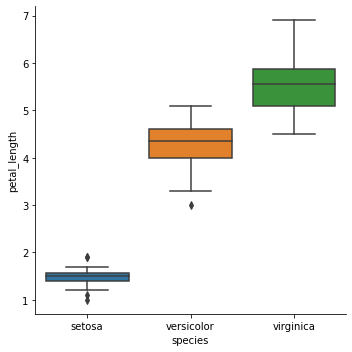

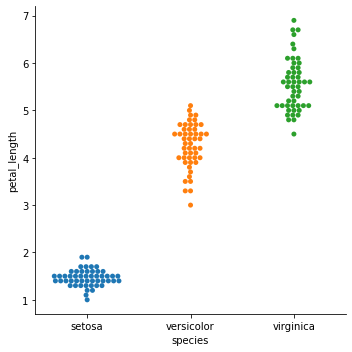

In [3]:
sns.catplot(data=iris, x="species", y="petal_length", kind="box")
sns.catplot(data=iris, x="species", y="petal_length", kind="swarm")

In [11]:
print(stats.ttest_ind(iris[iris['species']=="setosa"].petal_length, \
                      iris[iris['species']=="versicolor"].petal_length))

print(stats.ttest_ind(iris[iris['species']=="virginica"].petal_length, \
                      iris[iris['species']=="versicolor"].petal_length))

Ttest_indResult(statistic=-39.492719391538095, pvalue=5.404910513441677e-62)
Ttest_indResult(statistic=12.603779441384985, pvalue=3.1788195478061495e-22)


4. Generate a seaborn pairplot of the iris data colored by species 

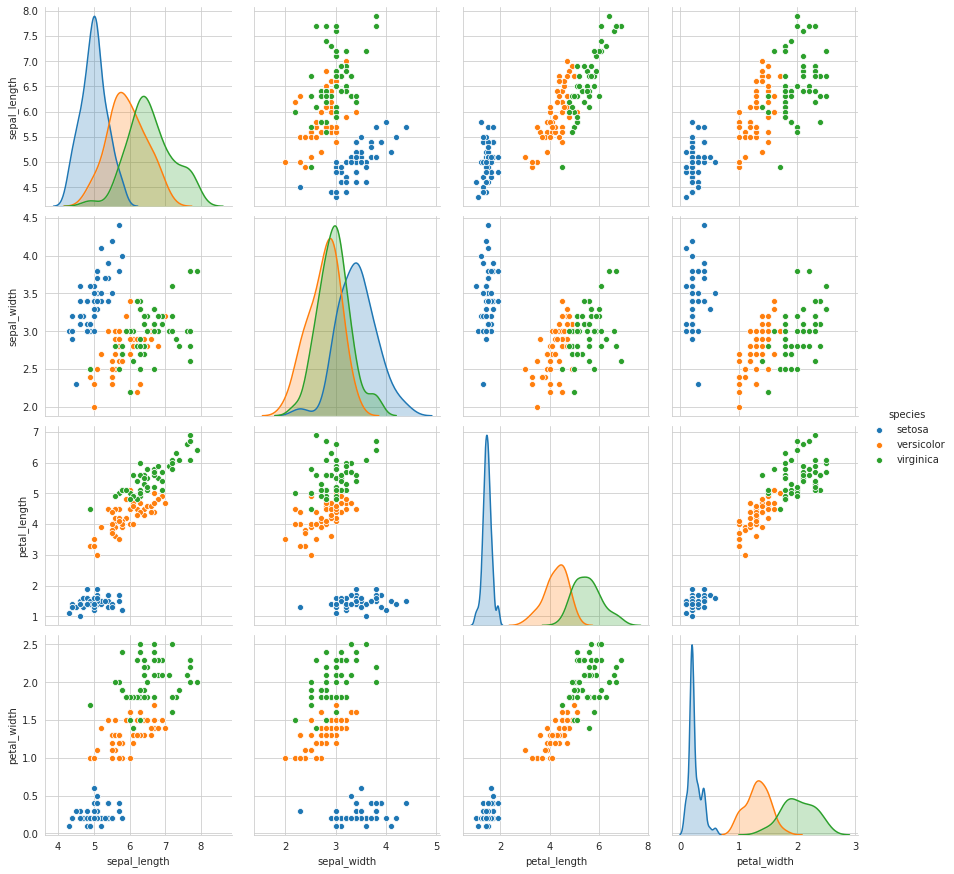

In [19]:
sns.pairplot(iris,height=3,hue="species")

4. Write a for loop to generate to test if each flower measurement is a normal distribution. If the distribution is normal print the p-value, if the distribution is not normal print "Distribution not normal!" (hint scipy has a normaltest function https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

In [26]:
for param in ["sepal_length", "sepal_width", "petal_length", "petal_width"]:
    z, pval = stats.normaltest(iris[param])
    #print(z)
    if(pval < 0.055):
        print("%s has a p-value of %f - distribution is not normal" % (param, pval))
    else:
        print("%s has a p-value of %f" % (param, pval))

sepal_length has a p-value of 0.056824
sepal_width has a p-value of 0.209734
petal_length has a p-value of 0.000000 - distribution is not normal
petal_width has a p-value of 0.000000 - distribution is not normal


5. Generate a correlation matrix between the iris variables, plot it as a heatmap with the axes labelled (Hint pandas has a correlation function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) Does the plot look different when you change the correlation method?

<AxesSubplot:>

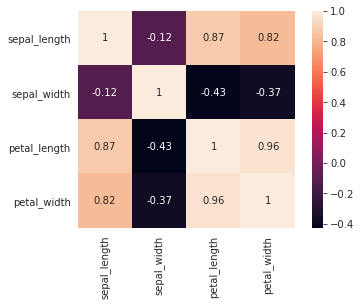

In [35]:
corrmat = iris.corr()
sns.heatmap(corrmat, annot = True, square = True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           4.68e-86
Time:                        12:28:53   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3631      0.040     -9.131      0.0

Plot a seaborn pairplot with regression lines fit to each scatter plot

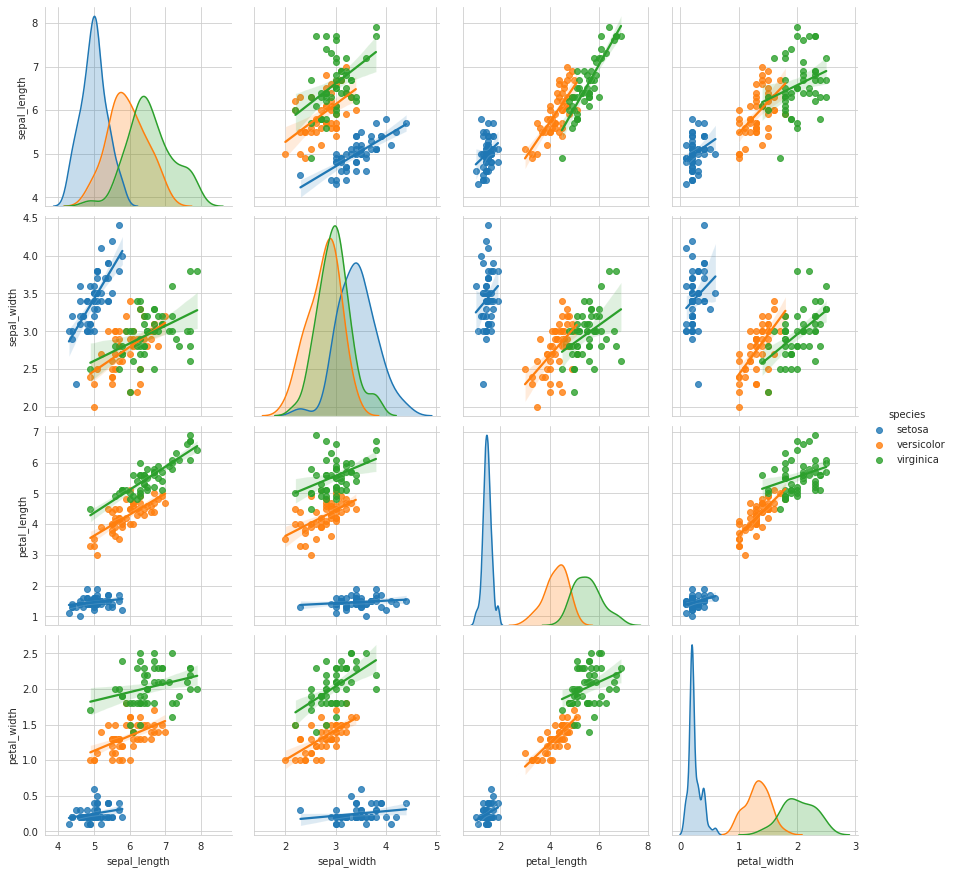

In [60]:
sns.pairplot(iris,height=3,hue="species", kind = "reg")

subset the iris dataframe to contain only the petal_length and petal_width columns 

In [ ]:
reg = iris[['petal_length', 'petal_width']]

In [61]:
# run the following code to generate a linear model of petal_length and petal_width
from statsmodels.formula.api import ols
model = ols("y ~ x", reg).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           4.68e-86
Time:                        12:33:15   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3631      0.040     -9.131      0.0

In a markdown cell explain what the output above means, in your own words